<a href="https://colab.research.google.com/github/ganireddikumar/Assignment1/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat Jan  4 10:41:03 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.5.1+cu121


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torch
from torchvision import datasets
from torchvision import transforms

In [4]:
train_data = datasets.MNIST(root=".",
                               train=True,
                               download=True,
                               transform=transforms.ToTensor())
test_data = datasets.MNIST(root=".",
                              train=False,
                              download=True,
                              transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 498kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.95MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.59MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [5]:
len(train_data),len(test_data)

(60000, 10000)

In [6]:
img = train_data[0][0]
label = train_data[0][1]
img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
img.shape, label

(torch.Size([1, 28, 28]), 5)

In [8]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


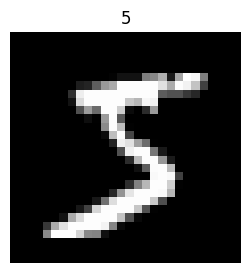

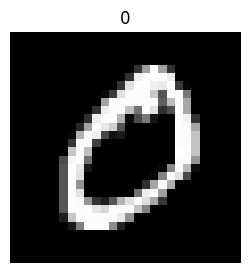

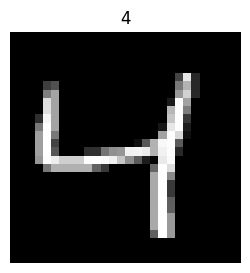

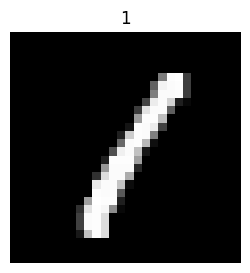

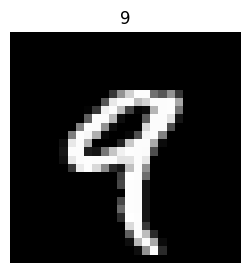

In [11]:
import matplotlib.pyplot as plt
for i in range(5):
  img = train_data[i][0]
  print(img.shape)
  img_squeeze = img.squeeze()
  print(img_squeeze.shape)
  label = train_data[i][1]
  plt.figure(figsize=(3,3))
  plt.imshow(img_squeeze,cmap="gray")
  plt.title(label)
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [12]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data,
                              batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(dataset = test_data,
                              batch_size=32,
                              shuffle=False)

In [13]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78b0e0a78eb0>,
 <torch.utils.data.dataloader.DataLoader at 0x78b0e0a79390>)

In [14]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [15]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [24]:
from torch import nn
class MNIST_model(nn.Module):
  def __init__(self,input_shape: int,hidden_units: int,output_shape: int):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  stride=1,
                  padding =1,
                  kernel_size=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  stride=1,
                  padding=1,
                  kernel_size=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block1(x)
    x = self.conv_block2(x)
    x = self.classifier(x)
    return x


In [25]:
device

'cuda'

In [26]:
model = MNIST_model(
    input_shape=1,
    hidden_units=10,
    output_shape=10).to(device)

model

MNIST_model(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [27]:
model.state_dict()

OrderedDict([('conv_block1.0.weight',
              tensor([[[[ 0.2855, -0.2822, -0.0327],
                        [ 0.1773,  0.2606, -0.0233],
                        [ 0.0229, -0.0069,  0.0836]]],
              
              
                      [[[-0.2087,  0.0768, -0.0395],
                        [ 0.0532, -0.0669,  0.0796],
                        [ 0.2795, -0.2173, -0.3166]]],
              
              
                      [[[-0.1929,  0.1546, -0.1709],
                        [ 0.1012,  0.1486, -0.0099],
                        [-0.2148, -0.2309,  0.2838]]],
              
              
                      [[[ 0.0907, -0.2997,  0.0623],
                        [ 0.2399, -0.2210,  0.2849],
                        [ 0.2130,  0.0499,  0.1995]]],
              
              
                      [[[-0.0538,  0.2816,  0.2878],
                        [ 0.1963, -0.1981,  0.1876],
                        [ 0.3132, -0.2978, -0.1837]]],
              
              
       

In [28]:
dummy_x = torch.rand(size=(1,28,28)).unsqueeze(dim=0).to(device)
model(dummy_x)

tensor([[ 0.0348, -0.0141,  0.0101,  0.0419, -0.0092, -0.0474, -0.0415, -0.0572,
         -0.0593,  0.0216]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [29]:
dummy_x_2 = torch.rand(size=([1,10,7,7]))
dummy_x_2

tensor([[[[0.3898, 0.4001, 0.8151, 0.1765, 0.3260, 0.5396, 0.8921],
          [0.9274, 0.5433, 0.5199, 0.7436, 0.7262, 0.0779, 0.4581],
          [0.9768, 0.3437, 0.6743, 0.8938, 0.4772, 0.4286, 0.4082],
          [0.5513, 0.7029, 0.9554, 0.1308, 0.2309, 0.6481, 0.2492],
          [0.6419, 0.8122, 0.4773, 0.2750, 0.5704, 0.4738, 0.6162],
          [0.2677, 0.3031, 0.1832, 0.4164, 0.7898, 0.7988, 0.4565],
          [0.7338, 0.2167, 0.2482, 0.9043, 0.0853, 0.1945, 0.9411]],

         [[0.4806, 0.4005, 0.8440, 0.7802, 0.0853, 0.2608, 0.9059],
          [0.5977, 0.1769, 0.8345, 0.0130, 0.9203, 0.8069, 0.0332],
          [0.7527, 0.8271, 0.6585, 0.3202, 0.0194, 0.2240, 0.0632],
          [0.5746, 0.8612, 0.0419, 0.8697, 0.6185, 0.0760, 0.1627],
          [0.1641, 0.2755, 0.7507, 0.1324, 0.9176, 0.6005, 0.5246],
          [0.5567, 0.1876, 0.3910, 0.2281, 0.2027, 0.3925, 0.7782],
          [0.9489, 0.2285, 0.8721, 0.6106, 0.6577, 0.8356, 0.1297]],

         [[0.5974, 0.8927, 0.6331, 0.0973, 0

In [30]:
flatten_layer = nn.Flatten()
flatten_layer(dummy_x_2).shape

torch.Size([1, 490])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
from logging import logProcesses
%%time
from tqdm.auto import tqdm
model_cpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to("cpu")

loss_fn = nn.CrossEntropyLoss()
optimizer = nn.optim.SGD(model_cpu.parameters(),lr=0.1)

epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch,(X,y) in enumerate(train_dataloader):
    model_cpu.train()
    X,y = X.to("cpu"),y.to("cpu")
    y_pred = model_cpu(X)

    loss = loss_fn(y_pred,y)
    train_loss +=loss

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
  train_loss /= len(train_dataloader)
  test_loss_total = 0

  model_cpu.eval()
  with torch.inference_model():
    for batch,(X_test,y_test) in enumerate(test_dataloader):
      X_test,y_test = X_test.to("cpu"),y_test.to("cpu")
      test_pred = model_cpu(X_test)

      test_loss = loss_fn(test_pred,y)
      test_loss_total +=test_loss

    test_loss_total /= len(test_dataloader)
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test Loss: {test_loss_total:.3f}")

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?